In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("C:\\Users\\ajroy\\OneDrive\\Desktop\\New folder\\zomato_EDA\\data\\zomato.csv")
df.head()



,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [4]:
# my dataset  column
df.columns


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')

In [5]:
# my dataset info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [6]:
# my dataset describe
df.describe()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
count,56235,56236,56233,56194,48414,56174,54956,56126,55914,28027,56049,55731,51642
unique,13397,11914,2639,2902,2877,5195,17712,2920,2961,8067,5553,2879,2783
top,('Rated 4.0',('Rated 4.0',Yes,No,NEW,0,('Rated 4.0',BTM,Quick Bites,('Rated 4.0',North Indian,300,Delivery
freq,942,300,30444,45268,2208,10027,412,5125,19132,407,2913,7576,24317


In [7]:
# my dataset shape
df.shape

(56252, 13)

In [8]:
# my dataset isnull
df.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

In [9]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], shape=(2878,), dtype=object)

In [10]:
def handlerate(value):
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        value = str(value).split('/')
        value = value[0]
        return float(value)
    
df['rate'] = df['rate'].apply(handlerate)
df['rate'].head()


ValueError: could not convert string to float: '\\nTop floor'

In [ ]:
df['rate'].fillna(df['rate'].mean(), )
df['rate'].isnull().sum()

np.int64(0)

In [ ]:
df.rename(columns = {'approx_cost(for two people)':'Cost2plates', 'listed_in(type)':'Type'}, inplace = True)
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,Cost2plates,Type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [ ]:
df['location'].unique()


array(['Banashankari', 'Basavanagudi', 'Mysore Road', ...,
       ' which were good', ' LIIT original had very less liquor',
       " no complaints there\\nZomato gold on food makes it pocket friendly .')"],
      shape=(2920,), dtype=object)

In [ ]:
df['Cost2plates'].unique()
def handlecost(value):
    value = str(value).replace(',','')
    if(value=='NEW' or value=='-'):
        return np.nan
    else:
        return float(value)


In [ ]:
# dropping the 'dish_liked' column as it contains more than 50% missing values
df = df.drop('dish_liked', axis=1)


In [ ]:
# --- Convert numeric columns from string to int/float safely ---

# Remove commas and convert 'votes' to numeric
df['votes'] = df['votes'].astype(str).str.replace(',', '', regex=True)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')

# Remove commas and convert 'approx_cost(for two people)' to numeric
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',', '', regex=True)
df['approx_cost(for two people)'] = pd.to_numeric(df['approx_cost(for two people)'], errors='coerce')




In [ ]:
# --- Fill missing values ---

df['votes'] = df['votes'].fillna(df['votes'].mean())
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].median())
df['rest_type'] = df['rest_type'].fillna(df['rest_type'].mode()[0])
df['location'] = df['location'].fillna(df['location'].mode()[0])


In [ ]:
# checking for duplicate values
df.duplicated().sum()

np.int64(15797)

In [ ]:
# dropping duplicate values
df.drop_duplicates(inplace=True)
print("After removing duplicates, the new shape is:", df.shape)



After removing duplicates, the new shape is: (40455, 12)


In [ ]:


# Clean the 'rate' column safely

# 1️⃣ Convert everything to string and strip extra spaces
df['rate'] = df['rate'].astype(str).str.strip()

# 2️⃣ Remove '/5' part if present
df['rate'] = df['rate'].str.replace('/5', '', regex=False)

# 3️⃣ Replace unwanted text values (like 'NEW', '-', 'nan', 'Top floor', etc.) with NaN
df['rate'] = df['rate'].replace(
    ['NEW', '-', 'nan', 'Top floor', 'Excellent', 'High Floor', 'Ground Floor', 'None', ''],
    np.nan
)

# 4️⃣ Remove any non-numeric values using regex
df['rate'] = df['rate'].str.extract('(\d+\.\d+|\d+)')  # extract only numbers like 4.1 or 4

# 5️⃣ Convert to float
df['rate'] = df['rate'].astype(float)

# 6️⃣ Fill missing values with mean or median
df['rate'] = df['rate'].fillna(df['rate'].mean())

# 7️⃣ (Optional) Round to 1 decimal place
df['rate'] = df['rate'].round(1)


In [ ]:
#checking the 'rate' column after cleaning
df['rate'].isnull().sum()  
df['rate'].head()           
           

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
df['rate'].head()           

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40455 entries, 0 to 56251
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       40453 non-null  object 
 1   name          40454 non-null  object 
 2   online_order  40451 non-null  object 
 3   book_table    40417 non-null  object 
 4   rate          40455 non-null  float64
 5   votes         40455 non-null  float64
 6   phone         39647 non-null  object 
 7   location      40455 non-null  object 
 8   rest_type     40455 non-null  object 
 9   cuisines      40305 non-null  object 
 10  Cost2plates   40455 non-null  float64
 11  Type          37567 non-null  object 
dtypes: float64(3), object(9)
memory usage: 4.0+ MB


In [ ]:
#cheking the final missing values
df.isnull().sum()

address            2
name               1
online_order       4
book_table        38
rate               0
votes              0
phone            808
location           0
rest_type          0
cuisines         150
Cost2plates        0
Type            2888
dtype: int64

In [ ]:
cuisines = df['cuisines'].value_counts(ascending  = False)


cuisines_lessthan100 = cuisines[cuisines<100]



def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
        
df['cuisines'] = df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()


cuisines
others                                              23224
North Indian                                         2021
North Indian, Chinese                                1692
South Indian                                         1216
Bakery, Desserts                                      634
Biryani                                               602
Fast Food                                             528
South Indian, North Indian, Chinese                   507
Desserts                                              481
Cafe                                                  480
Bakery                                                413
 ('Rated 4.0'                                         363
Chinese                                               358
 ('Rated 5.0'                                         317
Ice Cream, Desserts                                   311
Chinese, North Indian                                 278
Mithai, Street Food                                   275
North

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,cuisines,Cost2plates,Type
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775.0,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,others,800.0,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787.0,080 41714161,Banashankari,Casual Dining,others,800.0,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918.0,+91 9663487993,Banashankari,"Cafe, Casual Dining",others,800.0,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88.0,+91 9620009302,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166.0,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,others,600.0,Buffet


C:\Users\ajroy\AppData\Local\Temp\ipykernel_2976\3366429183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


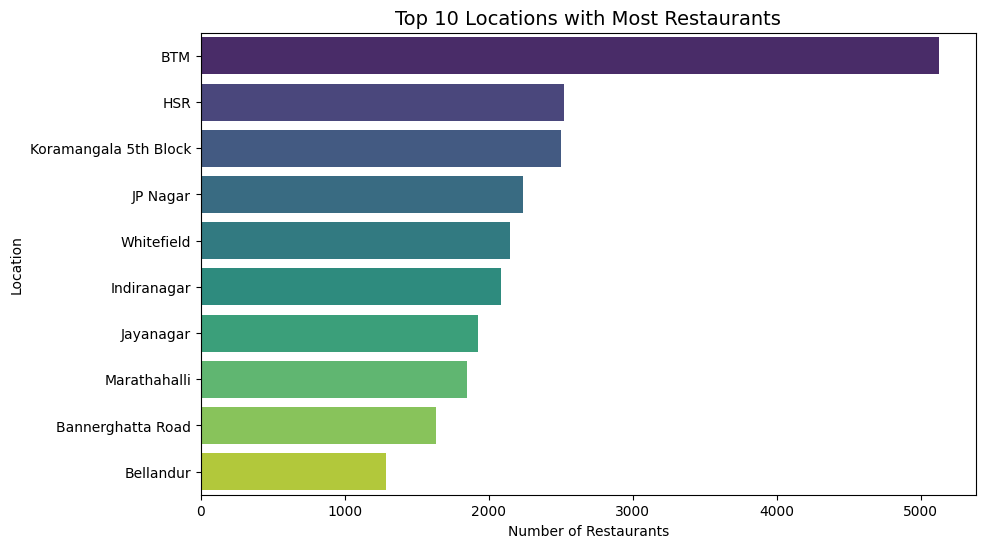

In [ ]:
top_locations = df['location'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
plt.title("Top 10 Locations with Most Restaurants", fontsize=14)
plt.xlabel("Number of Restaurants")
plt.ylabel("Location")
plt.show()


In [11]:
#checking location column after handling
df['location'].value_counts()
df['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', ...,
       ' which were good', ' LIIT original had very less liquor',
       " no complaints there\\nZomato gold on food makes it pocket friendly .')"],
      shape=(2921,), dtype=object)

In [16]:
#cleaning location column
def handle_location(value):
    if(value in top_locations):
        return value
    else:
        return 'Other locations'
    # Unique values check karna
print(df['location'].unique())


# Mask create karte waqt NaN handle karna
mask = df['location'].str.contains(r'\d', na=False)

# Galat rows dekhna
print(df[mask])

    

['Banashankari' 'Basavanagudi' 'Mysore Road' ... ' which were good'
 ' LIIT original had very less liquor'
 " no complaints there\\nZomato gold on food makes it pocket friendly .')"]
                                                 address  \
258                                         ('Rated 2.0'   
363                                         ('Rated 1.0'   
419                                         ('Rated 1.0'   
434     they should definitely focus on improving it....   
501     but nevertheless tasted yummy. Chicken Ala Ki...   
...                                                  ...   
56174   'RATED\n  Infra wise bad. Food wise ok. Music...   
56184                                       ('Rated 4.0'   
56186                                       ('Rated 5.0'   
56210                                       ('Rated 5.0'   
56214   good for a nice date or just a couple of frie...   

                                                    name  \
258     ""RATED\n  The food here is 

In [17]:
import pandas as pd
import numpy as np

# Sirf alphabetic strings aur spaces rakho, baaki NaN
df['location_clean'] = df['location'].apply(lambda x: x if isinstance(x, str) and all(c.isalpha() or c.isspace() for c in x) else np.nan)


In [18]:
df = df.dropna(subset=['location_clean'])


In [19]:
df['location_clean'] = df['location_clean'].fillna('Unknown')


C:\Users\ajroy\AppData\Local\Temp\ipykernel_14216\3945849585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location_clean'] = df['location_clean'].fillna('Unknown')


In [20]:
print(df['location_clean'].unique())


['Banashankari' 'Basavanagudi' 'Mysore Road' ' potato' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' ' bhel'
 ' this place is a great choice for its variety in fries' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road'
 ' mutton is well cooked and soft' ' biryani also came very late'
 ' each variant is lavished with aromatic whole spices such as clove'
 ' chicken hyderabadi was very bad prepared' 'Bommanahalli'
 'CV Raman Nagar' 'Electronic City' ' cramped place' 'HSR' 'Marathahalli'
 ' sometimes these small' ' Dal Tadka' 'however i will say'
 'Sarjapur Road' 'Wilson Garden' 'Shanti Nagar' 'Richmond Road'
 'Jalahalli' 'BBQ wings' 'Bellandur' 'Whitefield' 'East Bangalore'
 'Old Airport Road' ' schezwan chicken '
 ' will drink over vast options of starter ' 'Indiranagar'
 'cleanliness is a question here' ' veg kadai' 'Frazer Town' 'RT Nagar'
 ' Prawns infused in Garlic Olive Oil' ' chill' 'gatte ki s

In [21]:
import pandas as pd
import numpy as np
import re

def is_location(x):
    if not isinstance(x, str):
        return False
    # allow only letters, spaces, hyphens
    if not re.match(r'^[A-Za-z\s\-]{2,50}$', x.strip()):
        return False
    # optionally check if number of words <= 5
    if len(x.split()) > 5:
        return False
    return True

# Apply filter
df['location_clean'] = df['location'].apply(lambda x: x if is_location(x) else np.nan)

# Drop invalid rows
df = df.dropna(subset=['location_clean'])


C:\Users\ajroy\AppData\Local\Temp\ipykernel_14216\3181058979.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['location_clean'] = df['location'].apply(lambda x: x if is_location(x) else np.nan)


In [22]:
print(df['location_clean'].unique())


['Banashankari' 'Basavanagudi' 'Mysore Road' ' potato' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' ' bhel' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road'
 ' biryani also came very late' 'Bommanahalli' 'CV Raman Nagar'
 'Electronic City' ' cramped place' 'HSR' 'Marathahalli'
 ' sometimes these small' ' Dal Tadka' 'however i will say'
 'Sarjapur Road' 'Wilson Garden' 'Shanti Nagar' 'Richmond Road'
 'Jalahalli' 'BBQ wings' 'Bellandur' 'Whitefield' 'East Bangalore'
 'Old Airport Road' ' schezwan chicken ' 'Indiranagar'
 'cleanliness is a question here' ' veg kadai' 'Frazer Town' 'RT Nagar'
 ' chill' 'gatte ki sabzi' 'MG Road' 'Brigade Road' 'Lavelle Road'
 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar' 'Infantry Road'
 'Cunningham Road' 'Race Course Road' 'Commercial Street' 'Vasanth Nagar'
 'HBR Layout' 'Domlur' 'Ejipura' 'Jeevan Bhima Nagar' 'Old Madras Road'
 ' serving Arabic' 'chil

In [23]:
df['location_clean'] = df['location_clean'].fillna('Unknown')


In [27]:
# Example master list of Bangalore locations
locations_list = [
    'Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar', 'Kumaraswamy Layout',
    'Rajarajeshwari Nagar', 'Vijay Nagar', 'Uttarahalli', 'JP Nagar', 'South Bangalore',
    'City Market', 'Nagarbhavi', 'Bannerghatta Road', 'BTM', 'Kanakapura Road',
    'Bommanahalli', 'CV Raman Nagar', 'Electronic City', 'HSR', 'Marathahalli',
    'Sarjapur Road', 'Wilson Garden', 'Shanti Nagar', 'Richmond Road', 'Jalahalli',
    'Bellandur', 'Whitefield', 'East Bangalore', 'Indiranagar', 'MG Road',
    'Brigade Road', 'Lavelle Road', 'Church Street', 'Ulsoor', 'Residency Road',
    'Shivajinagar', 'Infantry Road', 'Cunningham Road', 'Race Course Road',
    'Commercial Street', 'Vasanth Nagar', 'HBR Layout', 'Domlur', 'Ejipura',
    'Jeevan Bhima Nagar', 'Old Madras Road', 'KR Puram', 'Koramangala', 'Hosur Road',
    'Rajajinagar', 'Malleshwaram', 'Seshadripuram', 'Kammanahalli', 'Majestic',
    'Langford Town', 'Central Bangalore', 'Sanjay Nagar', 'Brookefield',
    'Banaswadi', 'North Bangalore', 'Nagawara', 'Hennur', 'Kalyan Nagar',
    'New BEL Road', 'Jakkur', 'Thippasandra', 'Kaggadasapura', 'Sadashiv Nagar',
    'Basaveshwara Nagar', 'Yeshwantpur', 'West Bangalore', 'Magadi Road', 'Yelahanka',
    'Sahakara Nagar', 'Peenya', 'Hebbal', 'Begumpet', 'Richards Town'
]

# Ab clean location apply karenge
df['location_clean'] = df['location'].apply(lambda x: x if x in locations_list else np.nan)

# Drop invalid rows
df = df.dropna(subset=['location_clean'])

# Check result
print(df['location_clean'].unique())


['Banashankari' 'Basavanagudi' 'Mysore Road' 'Jayanagar'
 'Kumaraswamy Layout' 'Rajarajeshwari Nagar' 'Vijay Nagar' 'Uttarahalli'
 'JP Nagar' 'South Bangalore' 'City Market' 'Nagarbhavi'
 'Bannerghatta Road' 'BTM' 'Kanakapura Road' 'Bommanahalli'
 'CV Raman Nagar' 'Electronic City' 'HSR' 'Marathahalli' 'Sarjapur Road'
 'Wilson Garden' 'Shanti Nagar' 'Richmond Road' 'Jalahalli' 'Bellandur'
 'Whitefield' 'East Bangalore' 'Indiranagar' 'MG Road' 'Brigade Road'
 'Lavelle Road' 'Church Street' 'Ulsoor' 'Residency Road' 'Shivajinagar'
 'Infantry Road' 'Cunningham Road' 'Race Course Road' 'Commercial Street'
 'Vasanth Nagar' 'HBR Layout' 'Domlur' 'Ejipura' 'Jeevan Bhima Nagar'
 'Old Madras Road' 'Malleshwaram' 'Seshadripuram' 'Kammanahalli'
 'Majestic' 'Langford Town' 'Central Bangalore' 'Sanjay Nagar'
 'Brookefield' 'KR Puram' 'Koramangala' 'Hosur Road' 'Rajajinagar'
 'Banaswadi' 'North Bangalore' 'Nagawara' 'Hennur' 'Kalyan Nagar'
 'New BEL Road' 'Jakkur' 'Thippasandra' 'Kaggadasapura' 'Heb

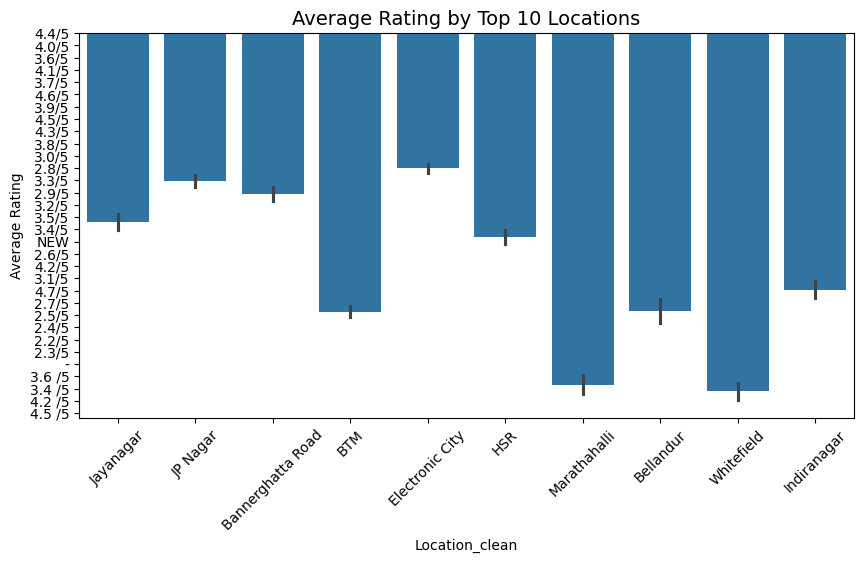

In [31]:



top_locations = df['location_clean'].value_counts().nlargest(10).index
plt.figure(figsize=(10,5))
sns.barplot(x='location_clean', y='rate', data=df[df['location_clean'].isin(top_locations)], estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Average Rating by Top 10 Locations", fontsize=14)
plt.xlabel("Location_clean")
plt.ylabel("Average Rating")
plt.show()











